### Load the data from keras:

In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


### Split the data as training and testing:

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Look at the shapes of the training and testing sets:

In [3]:
print('x_train shape: ',x_train.shape)
print('x_test shape: ',x_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)
y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


### There are 50000 images of x_train which has the shape of (32*32*3)

### There are 10000 images of x_test which has the shape of (32*32*3)

### The y_train.shape[1] and y_test.shape[1] are 1 since they represent the classes.

## -------------------------------------------------------------------------------------------------

### Lets plot 4 images from x_train folder and see what we are working with

In [4]:
import matplotlib.pyplot as plt

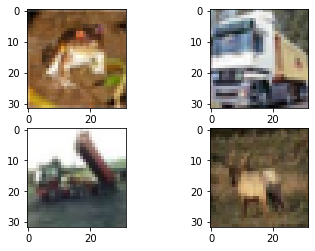

In [5]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(x_train[0])

axs[0, 1].imshow(x_train[1])

axs[1, 0].imshow(x_train[2])

axs[1, 1].imshow(x_train[3])


### The images are basically bunch of pixels which vary from 0,255. It is in our interest to normalize the data.

In [6]:
x_train = x_train/225
x_test = x_test/225

### We want use to_categorical function of keras to convert the class vector to binary matrix which will make sense later.
### This function will convert 
#### array([6], dtype=uint8) ----> array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [7]:
from keras.utils import to_categorical

In [8]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)
# 10 is the number of classes that we have.

### ---------------------------------------------------------------------------------------------------

### Lets build the model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

### The loss function we will use is categorical_crossentropy which is the common practice when
### the targets are of categorical format.
### For optimizer, rmsprop is chosen.
### Adding the accuracy as a metric so that we can document it later.

In [10]:
model1 = Sequential()

# CONVOLUTIONAL LAYER
model1.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model1.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model1.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model1.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model1.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model1.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Using the summary() function we can see our model:

In [11]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

### Training the data

In [12]:
model1.fit(x_train,y_cat_train,verbose=2,epochs=10)

Epoch 1/10
 - 122s - loss: 1.5057 - accuracy: 0.4627
Epoch 2/10
 - 114s - loss: 1.1547 - accuracy: 0.5969
Epoch 3/10
 - 108s - loss: 0.9974 - accuracy: 0.6535
Epoch 4/10
 - 117s - loss: 0.8921 - accuracy: 0.6942
Epoch 5/10
 - 104s - loss: 0.8095 - accuracy: 0.7217
Epoch 6/10
 - 119s - loss: 0.7496 - accuracy: 0.7452
Epoch 7/10
 - 119s - loss: 0.6945 - accuracy: 0.7639
Epoch 8/10
 - 104s - loss: 0.6599 - accuracy: 0.7777
Epoch 9/10
 - 116s - loss: 0.6240 - accuracy: 0.7897
Epoch 10/10
 - 115s - loss: 0.5943 - accuracy: 0.8019


### In the last epoch, we get the accuracy= 0.8019 and loss = 0.5943 

In [14]:
# good practice the save the model. time saver when you want to employ it later.
model1.save('cifar_10model1.h5')

### Lets evaluate the model using the test data sets.

In [16]:
model1.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 16s 2ms/step


[1.1692059326171875, 0.6322000026702881]

### As one can see the accuracy is 0.632 in the test data which is lower than what we have achieved in the training data.

### Lets predict now and see how we do in every class:

In [17]:
from sklearn.metrics import classification_report

In [19]:
predictions = model1.predict_classes(x_test)

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.53      0.62      1000
           1       0.83      0.68      0.75      1000
           2       0.70      0.39      0.50      1000
           3       0.42      0.59      0.49      1000
           4       0.67      0.56      0.61      1000
           5       0.67      0.36      0.47      1000
           6       0.53      0.88      0.66      1000
           7       0.75      0.72      0.73      1000
           8       0.66      0.80      0.72      1000
           9       0.62      0.82      0.71      1000

    accuracy                           0.63     10000
   macro avg       0.66      0.63      0.63     10000
weighted avg       0.66      0.63      0.63     10000



### Looking at the classification_report, we are struggling much more in some of the classes. Overall, there is room to improve.
